## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
combine_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
merge_df=pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID") 
merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice.
number_of_mice = mouse_metadata['Mouse ID'].count()
print('Number of Mice:', number_of_mice)

Number of Mice: 249


In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# find duplicate mice
duplicate_mouse=merge_df.loc[merge_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id=pd.DataFrame(duplicate_mouse)
all_duplicate_mouse_id

,0
0,g989


In [10]:
g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,13.000000,13.000000,13.000000,13.0,13.0
mean,14.615385,52.341020,0.538462,21.0,26.0
std,11.079549,5.243412,0.660225,0.0,0.0
min,0.000000,45.000000,0.000000,21.0,26.0
25%,5.000000,48.786801,0.000000,21.0,26.0
50%,15.000000,51.745156,0.000000,21.0,26.0
75%,20.000000,55.326122,1.000000,21.0,26.0
max,35.000000,62.570880,2.000000,21.0,26.0


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_mice=clean_df["Mouse ID"].value_counts()
clean_number_of_mice=len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Create inital summary table with Drug Regimes and counts
summarystats = pd.DataFrame(combine_data.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summarystats["Mean"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
summarystats["Median"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
summarystats["Variance"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
summarystats["SEM"] = pd.DataFrame(combine_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summarystats = summarystats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

# Rename column count
summarystats = summarystats.rename(columns = {"Mouse ID" : "Trials"})
summarystats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar and Pie Charts

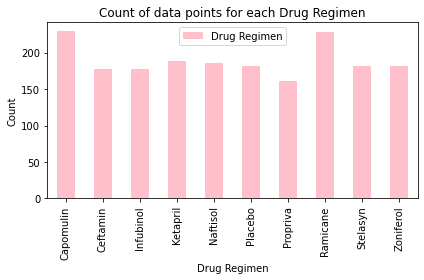

In [15]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combine_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="pink")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")
plt.tight_layout()

plt.show()

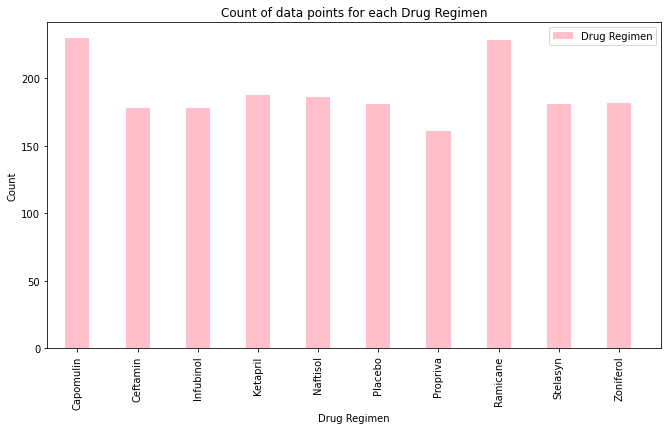

In [16]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(11,6))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='pink', align="center", width = 0.40)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.5, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show()

In [17]:
#  Group by gender and get the number to plot
groupby_gender = combine_data.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = clean_df["Sex"].value_counts()
colors = ["pink", "lightblue"]
explode = (0.1, 0)
pie_chart = gender_count.plot(kind="pie", explode=explode, labels=labels, shadow=True, title="Males vs Females", autopct="%1.2f%%", colors = colors, startangle=90)
pie_chart

NameError: name 'labels' is not defined

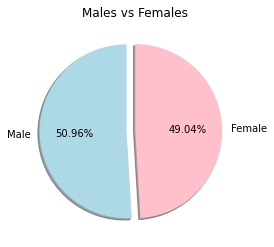

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using matplot
gender_count=clean_df["Sex"].value_counts()
labels=gender_count.index
sizes=gender_count.values
colors=["lightblue", "pink"]
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.title("Males vs Females")
plt.show()

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
treatment_regimens = clean_df[clean_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
last_timepoint = treatment_regimens.groupby("Mouse ID").max()["Timepoint"]
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
completed_last_timepoint_df = pd.merge(last_timepoint_df, clean_df, on=("Mouse ID", "Timepoint"),how="left")

# Disply the table for easier reference
completed_last_timepoint_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [21]:
cap_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin",:]
ram_df = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane", :]
inf_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol", :]
ceft_df = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [22]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [23]:
Tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = Tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")

Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [24]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [25]:
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [26]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, merge_df, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [27]:
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [28]:
# Ceftamin
Ceftamin_last = ceft_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combine_data, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [29]:
#Ceftamin
tumors4 = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

regimenData = combine_data[(combine_data["Drug Regimen"] == "Capomulin") | 
                          (combine_data["Drug Regimen"] == "Ramicane") | 
                          (combine_data["Drug Regimen"] == "Infubinol") | 
                          (combine_data["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()
regimenPlot = regimenDF["Tumor Volume (mm3)"]
regimenDF.head()

# quartile calculations
quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


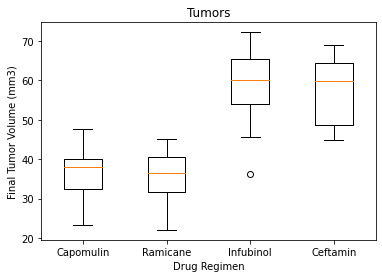

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [Tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title("Tumors")
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('boxplot')
plt.show()

In [32]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "b742",:]
forline_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,b742,0,45.000000,0,Capomulin,Male,7,21
327,b742,5,41.534097,0,Capomulin,Male,7,21
682,b742,10,41.999228,0,Capomulin,Male,7,21
839,b742,15,39.524843,0,Capomulin,Male,7,21
935,b742,20,37.950355,0,Capomulin,Male,7,21


## Line and Scatter Plots

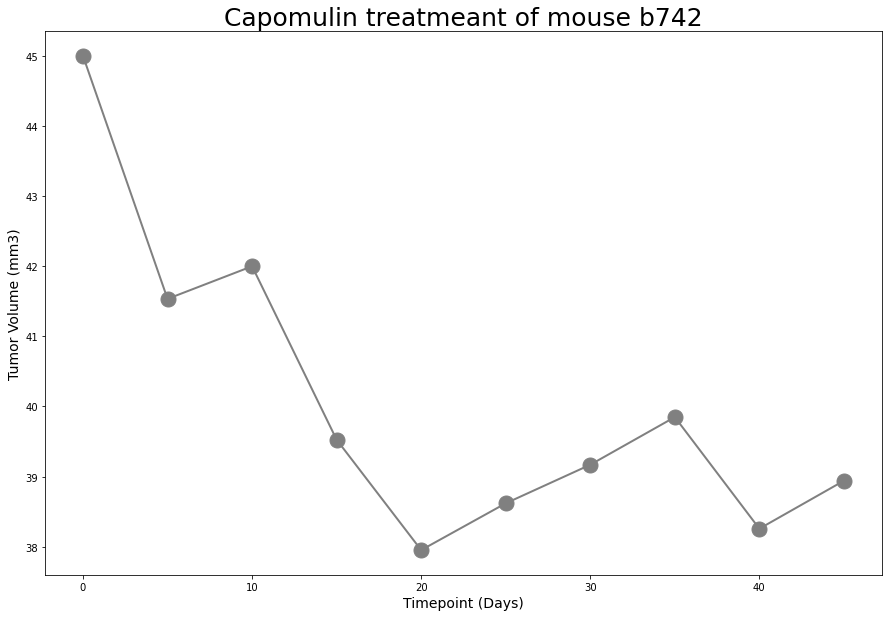

In [33]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumorData = combine_data[(combine_data["Drug Regimen"] == "Capomulin") & (combine_data["Mouse ID"] == "b128")]
tumorData = tumorData.groupby(["Drug Regimen", "Timepoint"])
tumorDataDF = tumorData["Tumor Volume (mm3)"].mean().to_frame()
tumorIndexDataDF = tumorDataDF.unstack(0)
tumorPlotDF = tumorIndexDataDF["Tumor Volume (mm3)"]
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Capomulin treatmeant of mouse b742',fontsize =25)
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="gray", label="Fahreneit")
plt.xlabel('Timepoint (Days)',fontsize =14)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)
plt.show()

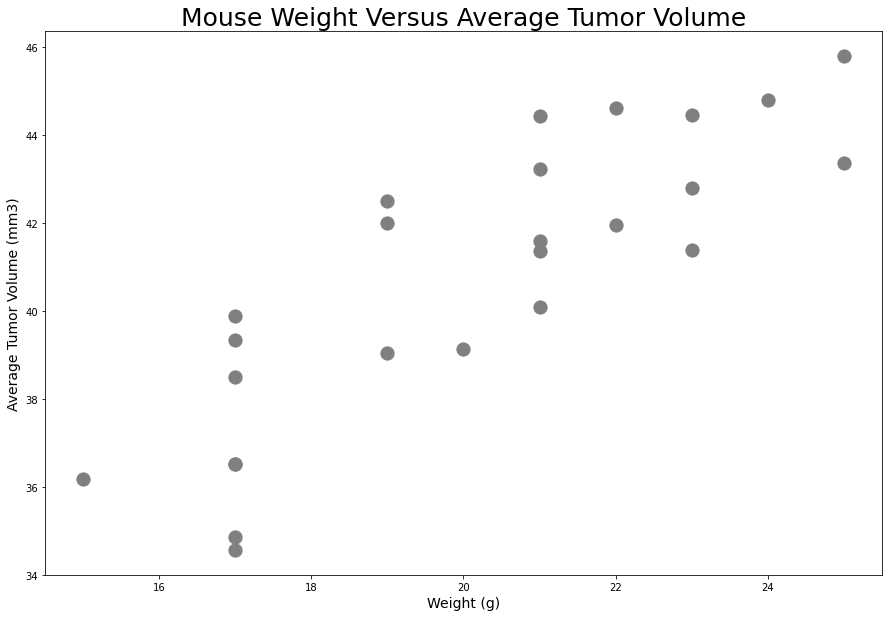

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
fig1, ax1 = plt.subplots(figsize=(15, 10))
marker_size=15
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'], s=175, color="gray")            
plt.title("Mouse Weight Versus Average Tumor Volume", fontsize =25)
plt.xlabel('Weight (g)', fontsize =14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize =14)

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [52]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
import scipy.stats as st
from scipy.stats import linregress

correlation = st.pearsonr(cap_df['Weight (g)'],cap_df['Tumor Volume (mm3)'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = cap_df['Weight (g)']
y_values = cap_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print (line_eq)

The correlation between both factors is 0.53
y = 0.96x + 21.49
